In [7]:
using Pkg; Pkg.activate(".."); Pkg.instantiate()

using OceanTurb.Diffusion, PyPlot, PyPlotPlus, LinearAlgebra

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = removespine(::PyCall.PyObject, ::String) at PyPlotPlus.jl:98
└ @ PyPlotPlus /data5/glwagner/.julia/packages/PyPlotPlus/qqxou/src/PyPlotPlus.jl:98
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = removespine(::PyCall.PyObject, ::String) at PyPlotPlus.jl:98
└ @ PyPlotPlus /data5/glwagner/.julia/packages/PyPlotPlus/qqxou/src/PyPlotPlus.jl:98


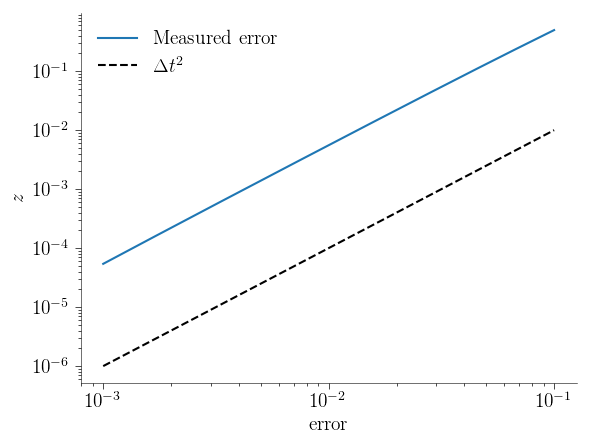

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = setticks(::PyCall.PyObject, ::String, ::Bool) at PyPlotPlus.jl:52
└ @ PyPlotPlus /data5/glwagner/.julia/packages/PyPlotPlus/qqxou/src/PyPlotPlus.jl:52


PyObject <matplotlib.legend.Legend object at 0x7f05660afa90>

In [8]:
# First, we define the model.
model = Model(N=100, L=π/2, κ=1)
z = model.grid.zc
    
c_init(z) = cos(2z)
c_ans(z, t) = exp(-4t) * c_init(z)

function c_err(model, dt, nt=1)
    model.solution.c = c_init
    reset!(model.clock)
    iterate!(model, dt, nt)
    norm(c_ans.(z, model.clock.time) .- model.solution.c.data)
end

dt = 0.001:0.0001:0.1
errors = similar(dt)

for i in 1:length(dt)
    errors[i] = c_err(model, dt[i])
end

# Initialize plotting
ax, fig = subplots()
xlabel("error")
ylabel(L"z")
cornerspines()

plot(dt, errors, "-", label="Measured error")
plot(dt, dt.^2, "k--", label=L"\Delta t^2")

yscale("log")
xscale("log")
legend()

In [9]:
errors ./ dt.^2

991-element Array{Float64,1}:
 54.16698160009545 
 54.37092872302872 
 54.539631720922436
 54.681224200894086
 54.80151588068159 
 54.90476722143132 
 54.99417356785365 
 55.07217841937233 
 55.14068227537104 
 55.20118552935778 
 55.25488849709559 
 55.302762861808944
 55.3456036376312  
  ⋮                
 49.76853253893395 
 49.76234379185473 
 49.756156190065596
 49.74996973343287 
 49.74378442182232 
 49.73760025509924 
 49.731417233128354
 49.72523535577393 
 49.71905462289993 
 49.71287503436939 
 49.70669659004534 
 49.70051928978989 

In [12]:
errors[1] 

5.4166981600095446e-5

In [13]:
errors[end]

0.49700519289789896